In [1]:
# Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample


In [2]:
# Reading and displying the dataset
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Exploration

In [3]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Returns statistics on numeric values of columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Returns total sum of total null values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Replacing the 0 values to NaN
diabetes_data_copy = df.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
# Returns the shape (rows,columns)
df.shape

(768, 9)

In [8]:
# Returns the correlation of each columns
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Data Visualization

## Box Plot of Age

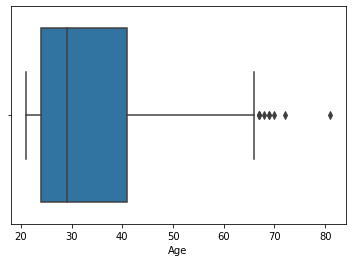

In [9]:
sns.boxplot(df.Age)

## Count Plot of Age with Outcome variable

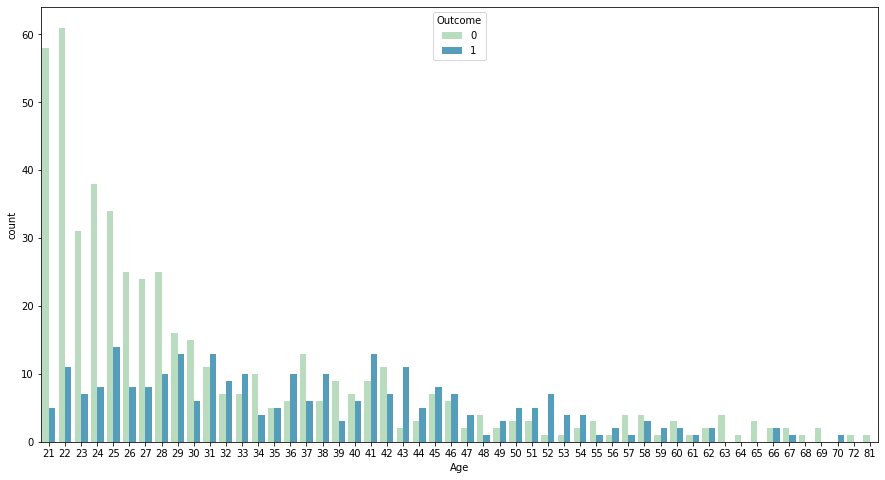

In [10]:
# Visualising the columns 'Age' using Countplot
plt.figure(figsize=(15,8))
sns.countplot(x='Age',data = df, hue = 'Outcome',palette='GnBu')
plt.show()

## Box plot of all the attributes

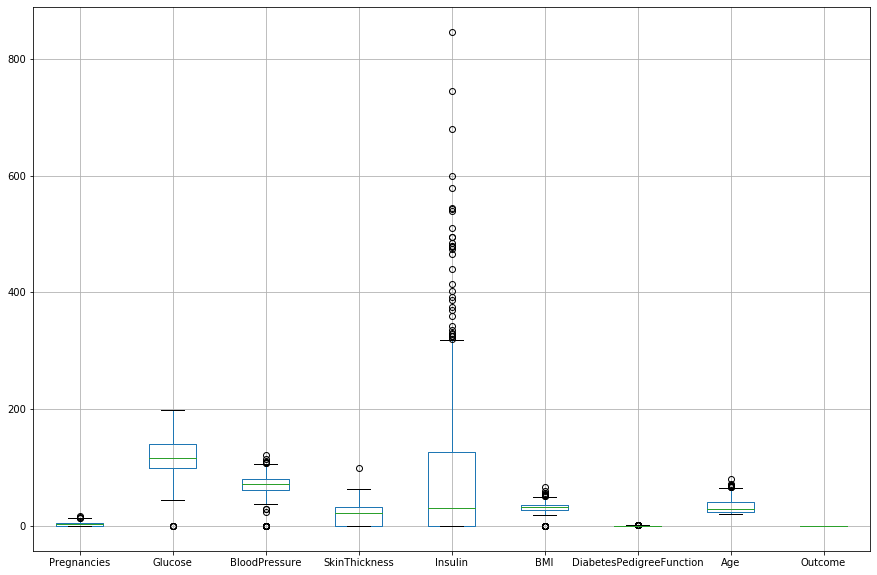

In [11]:
# Visualising the all the columns using Box plot
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

## Pair Plot

<Figure size 720x576 with 0 Axes>

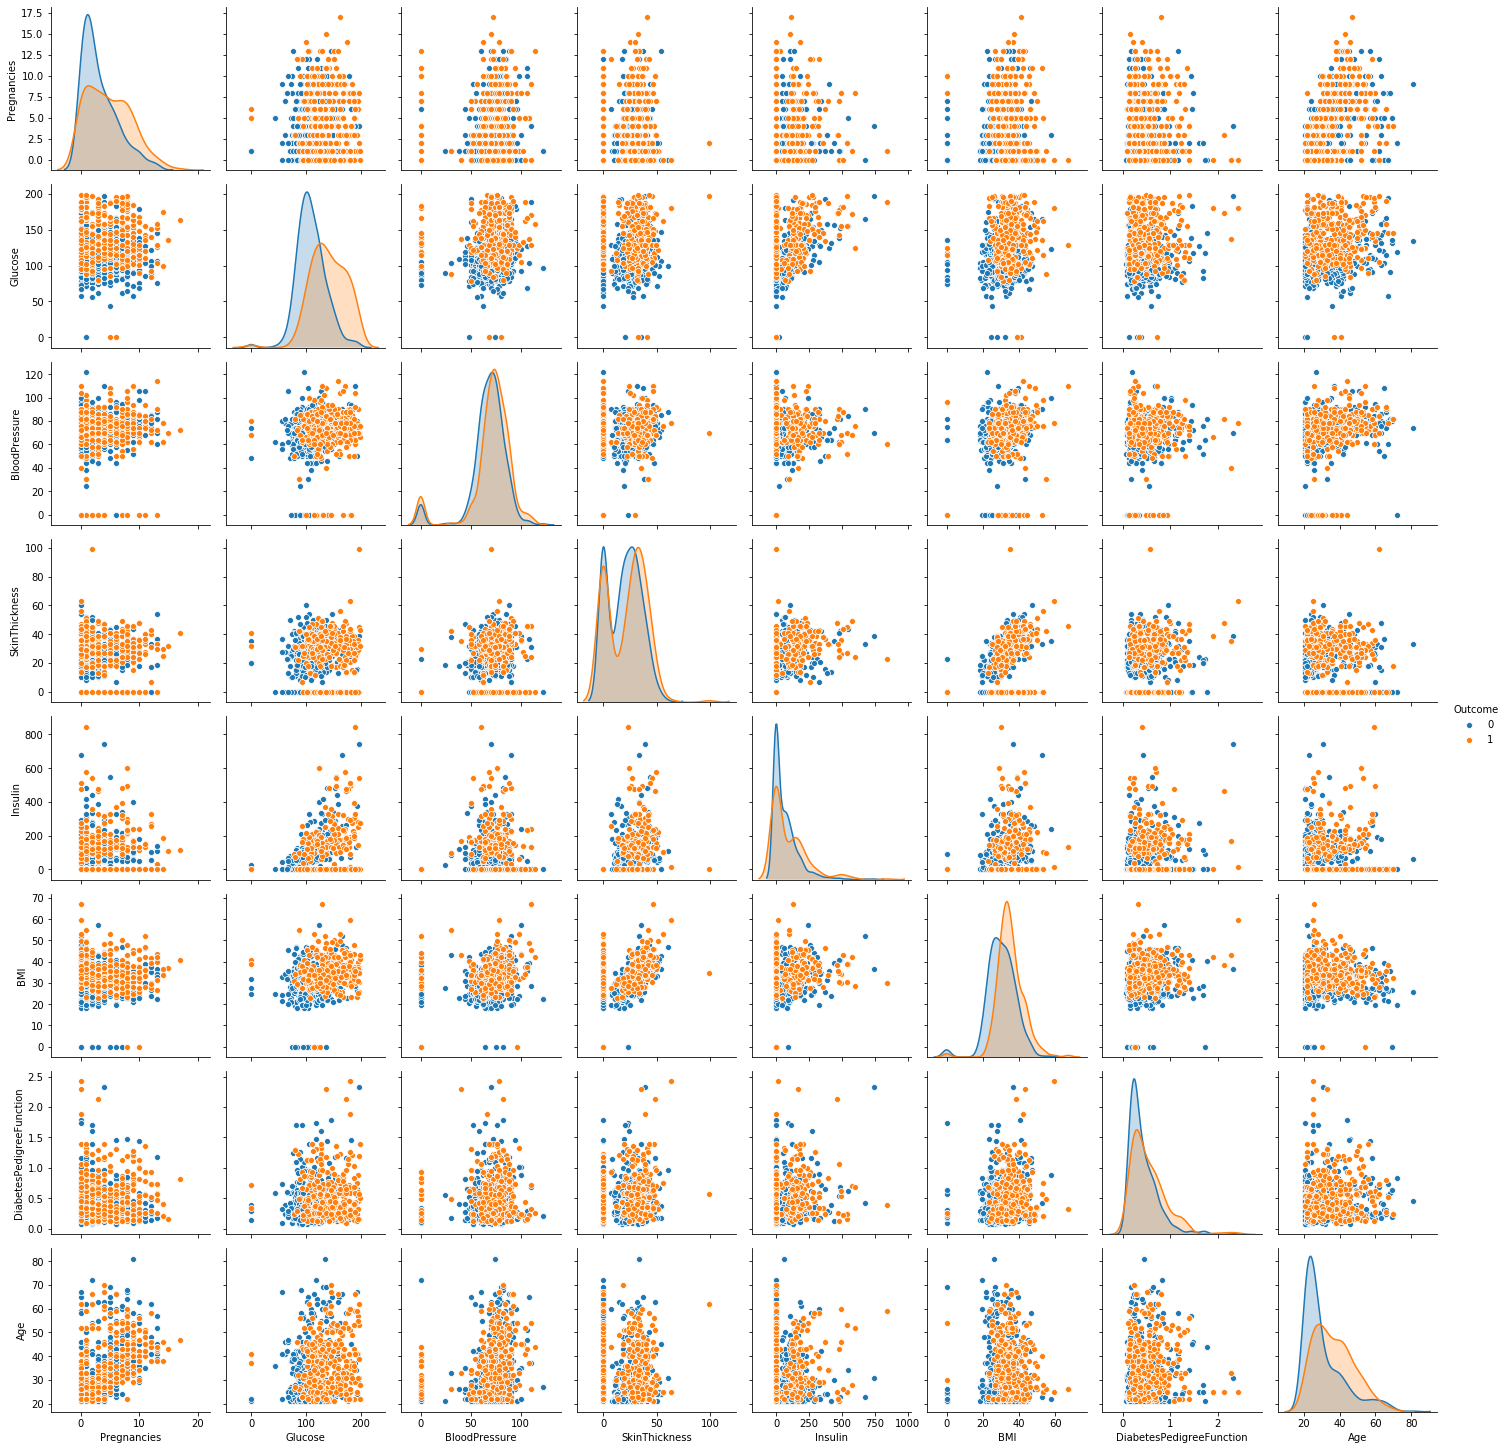

In [12]:
# Visualising the pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Outcome')
plt.show()

## Count Plot of Outcome

0    500
1    268
Name: Outcome, dtype: int64


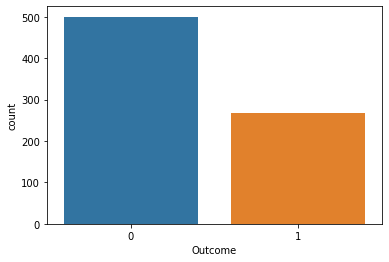

In [13]:
# Visualising the column 'Outcome' using Countplot
print(df.Outcome.value_counts())
sns.countplot(df.Outcome)
plt.show()

## Distribution Plot of all the attributes

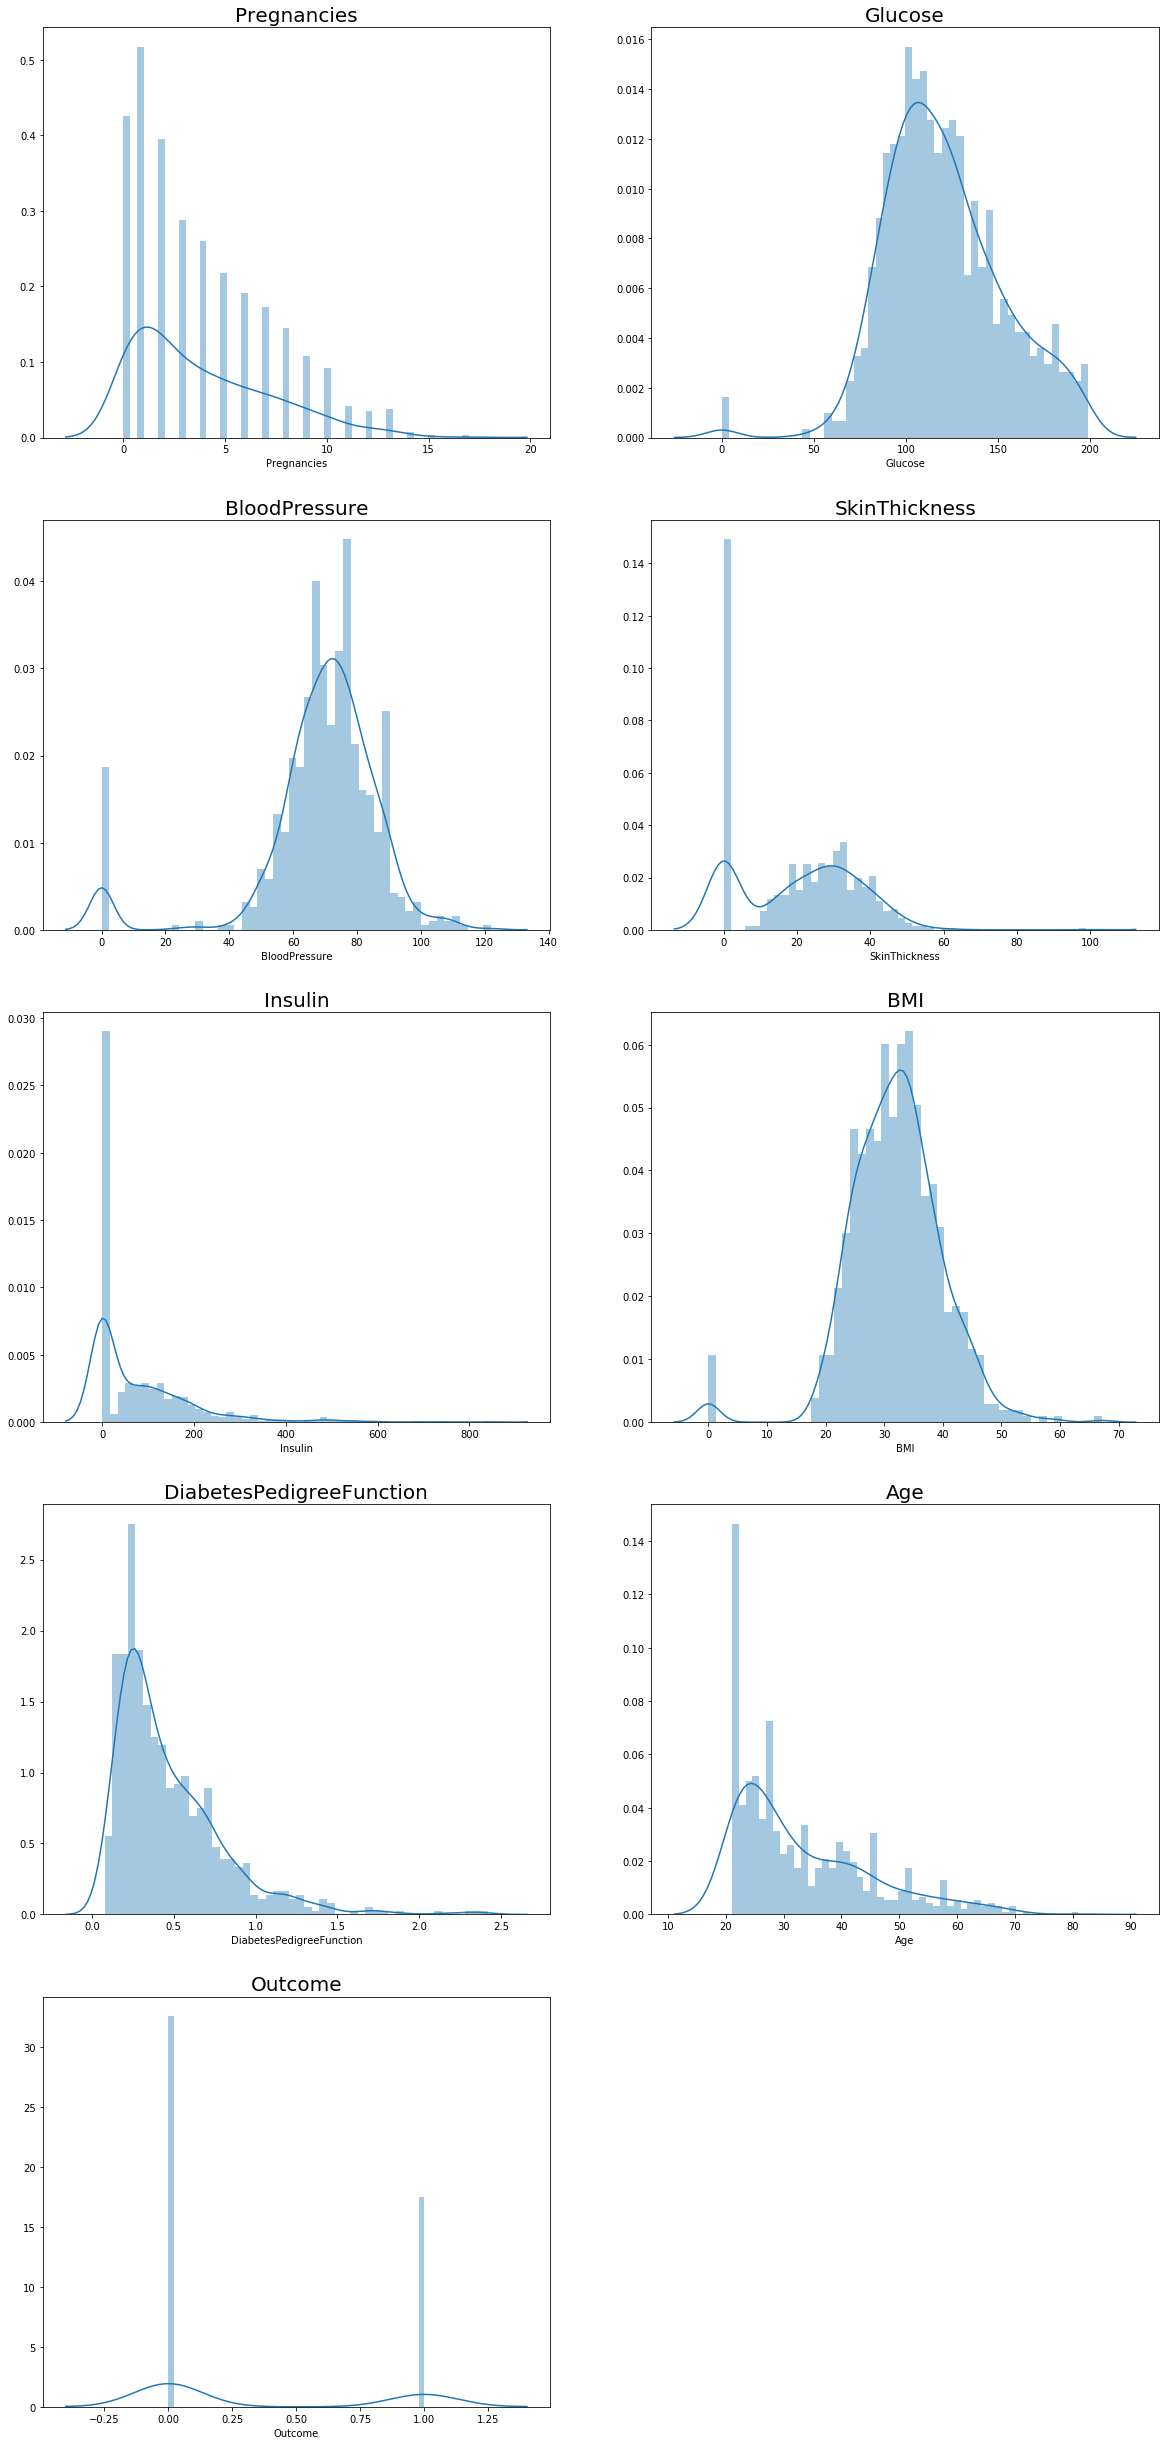

In [14]:
# Visualising the all the columns using histogram plot
nrows=len(df.columns)
ncolumns=2
subCnt=1
plt.figure(figsize=(20,80))
for i in df.columns[:]:
    plt.subplot(nrows,ncolumns,subCnt)
    plt.title(i, fontsize=20)
    sns.distplot(df[i],bins=50)
    # plt.hist(df[i],bins=50)
    subCnt = subCnt + 1

plt.show()

## Detecting Outliers

In [15]:
# Returns the lower and upper bound of the columns
def outlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bound=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bound=df[variable].quantile(0.75)+(IQR*1.5)
    return lower_bound,upper_bound

# Returns the extrem_lower and extrem_upper bound of the columns
def extrem_outlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bound=df[variable].quantile(0.25)-(IQR*3)
    upper_bound=df[variable].quantile(0.75)+(IQR*3)
    return lower_bound,upper_bound


In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
print(outlier(df,'Glucose'))
print("Total : ", df[df.Glucose == 0].shape[0])

(37.125, 202.125)
Total :  5


In [18]:
print(outlier(df,'BloodPressure'))
print("Total : ", df[df.BloodPressure == 0].shape[0])
print(df.BloodPressure.mean())

(35.0, 107.0)
Total :  35
69.10546875


In [19]:
print("Total : ", df[df.SkinThickness == 0].shape[0])
print(df.SkinThickness.mean())

Total :  227
20.536458333333332


In [20]:
print(outlier(df,'BMI'))
print("Total : ", df[df.BMI == 0].shape[0])

(13.35, 50.550000000000004)
Total :  11


In [21]:
print(extrem_outlier(df,'Insulin'))
print("Total : ", df[df.Insulin == 0].shape[0])
print(df.Insulin.mean())

(-381.75, 509.0)
Total :  374
79.79947916666667


In [22]:
print(extrem_outlier(df,'DiabetesPedigreeFunction'))
print(df.DiabetesPedigreeFunction.mean())

(-0.9037499999999999, 1.77375)
0.4718763020833327


# Removing the Outliers

In [23]:
data=df.copy()

In [24]:
data.loc[data['Glucose']<=37.125,'Glucose']=37
data.loc[data['BloodPressure']<=35.0,'BloodPressure']=69
data.loc[data['SkinThickness']<=0,'SkinThickness']=20
data.loc[data['BMI']<=13.35,'BMI']=13
data.loc[data['Insulin']<=0,'Insulin']=79
data.loc[data['Insulin']>=509.0,'Insulin']=509
data.loc[data['DiabetesPedigreeFunction']>=1.77375,'DiabetesPedigreeFunction']=0.471

Outlier Observation

There were many outlier which can be leed as overfitting or underfitting and can make bad model.
For controling this we have done Outlier remover.

Eg: As we can see there were many 0 values in BloodPressure. BloodPressure never be 0.

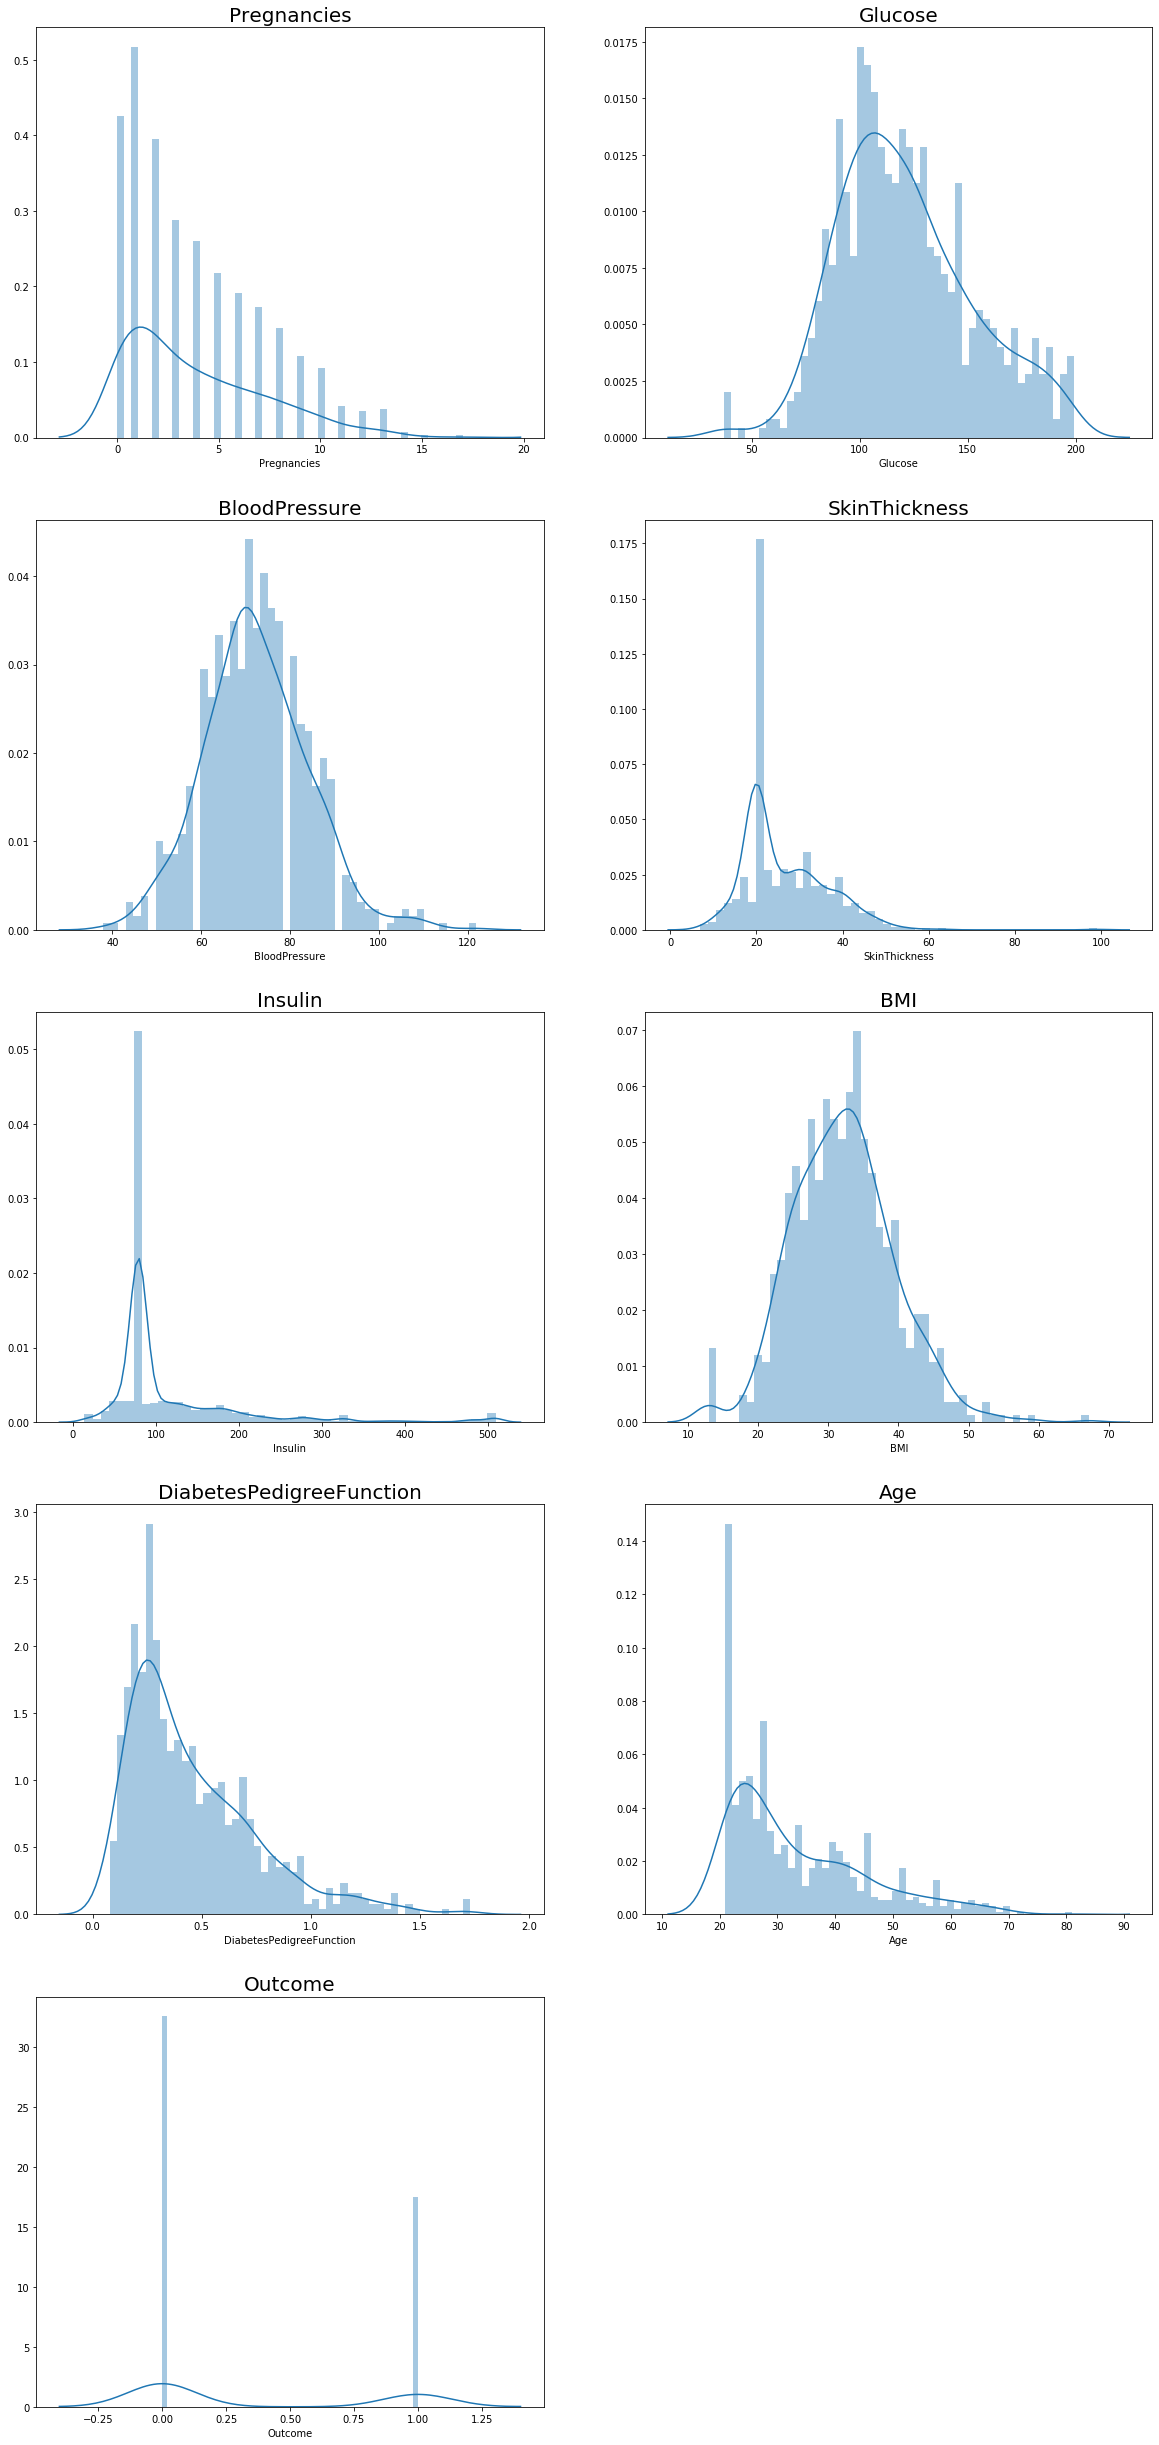

In [25]:
# Visualising the all the columns using histogram plot
nrows=len(data.columns)
ncolumns=2
subCnt=1
plt.figure(figsize=(20,80))
for i in data.columns[:]:
    plt.subplot(nrows,ncolumns,subCnt)
    plt.title(i, fontsize=20)
    sns.distplot(data[i],bins=50)
    # plt.hist(df[i],bins=50)
    subCnt = subCnt + 1

plt.show()

# Correlation Matrix

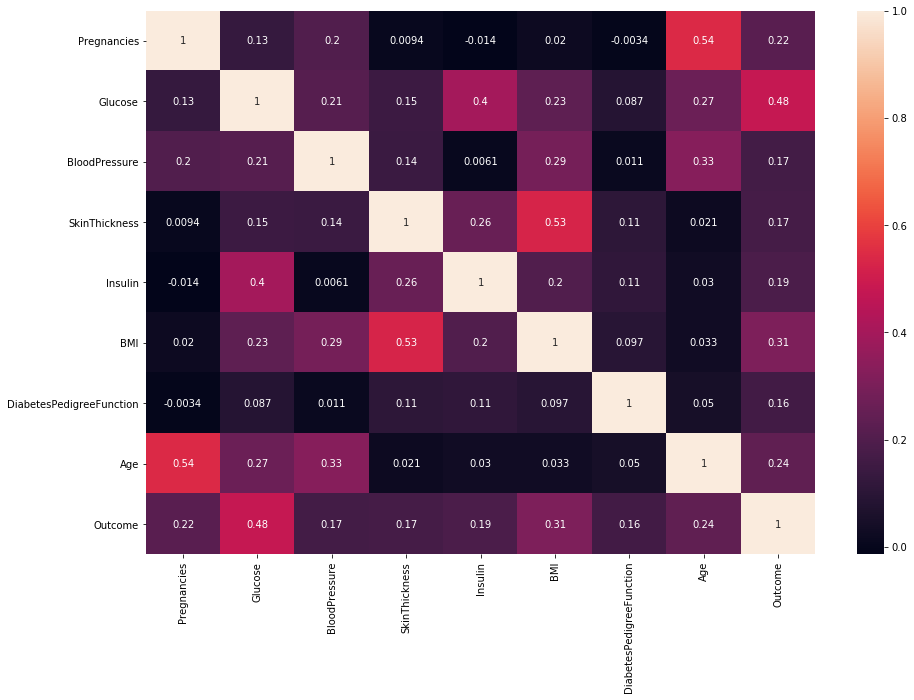

In [26]:
# Returns the correlation between all the attributes
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Reshaping Outcome values

In [27]:
print(data.Outcome.value_counts())
minority=data[data.Outcome==1]
majority=data[data.Outcome==0]

print("minority size",minority.shape)
print("majority size",majority.shape)
min_upsample=resample(minority,replace=True,n_samples=majority.shape[0])
print("minority upsample size",min_upsample.shape)
data=pd.concat([min_upsample,majority],axis=0)
print("After resample",data.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64
minority size (268, 9)
majority size (500, 9)
minority upsample size (500, 9)
After resample 1    500
0    500
Name: Outcome, dtype: int64


# Data Preprocessing

In [28]:
# Selecting 'Target' as y and remaining all the features as X
X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

# Spliting data into Train/Test

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
print("Train dataset",X_train.shape,y_train.shape)
print("Test dataset",X_test.shape,y_test.shape)

Train dataset (800, 8) (800,)
Test dataset (200, 8) (200,)


In [30]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Defining Modal Confusion Metrix and Classification Report

In [31]:
# Returns the models confusion metrix and classification report

def plot_scores(name_of_model,X_test):
    # Predicting the model
    y_pred = name_of_model.predict(X_test)
    
    # Returns confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(10,7))
    p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
    plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    print("\n")
    print("\t\t----------Classification report----------\n")
    # Returns Classification Report
    print(classification_report(y_test, y_pred))

# Model Building

## Finding optimal number of clusters using Elbow Method

In [32]:
# Calculating accuracy score values for 1 to 21 clusters

test_scores = []
train_scores = []

for i in range(1,21):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [33]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [34]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 84.5 % and k = [1]


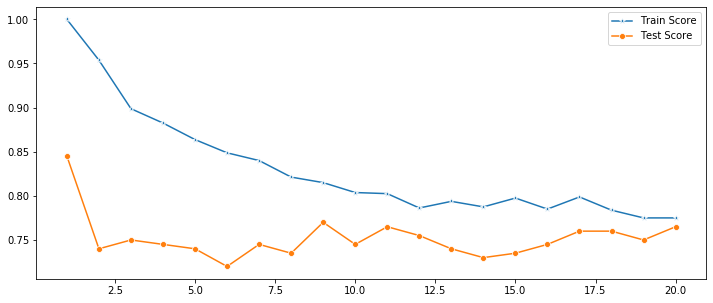

In [35]:
# Plotting the accuracy score values
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,21),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,21),test_scores,marker='o',label='Test Score')

# KNN Model Building

In [36]:
# Training the KNeighborsClassifier model with n_neighbors=13
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.745

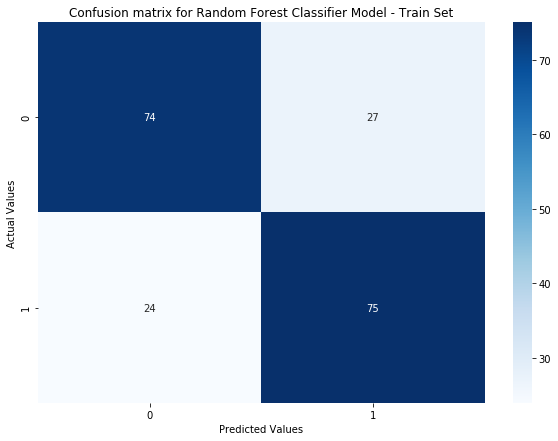



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       101
           1       0.74      0.76      0.75        99

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



In [37]:
plot_scores(knn, X_test)

# SVC Model Building

In [38]:
# Entering the parameters for hypertunning
kernels = [ 'poly','linear', 'rbf', 'sigmoid']
C = [1,10,20]
parameters={
            'kernel': kernels,
            'C':C
            }

In [39]:
# Training the SVC model with RandomizedSearchCV and ploting the confusion matrix
svc=SVC()
svc_CV = RandomizedSearchCV(svc, param_distributions=parameters,cv=10,
                            n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)
svc_CV.fit(X_train, y_train)

print(svc_CV.best_params_)

{'kernel': 'rbf', 'C': 20}


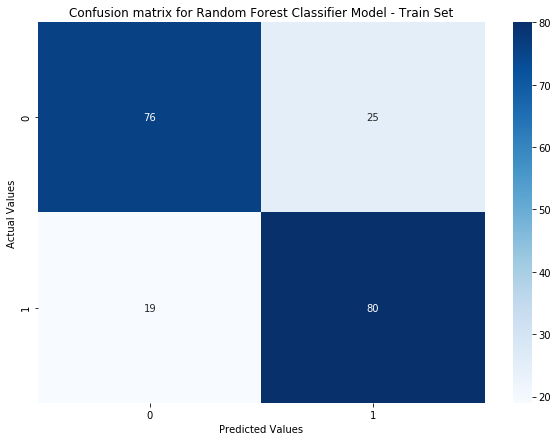



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       101
           1       0.76      0.81      0.78        99

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [40]:
plot_scores(svc_CV,X_test)

# LogisticRegression Model Building

In [41]:
# Entering the parameters for hypertunning 
param_grid_log = {'penalty' : ['l1', 'l2'],
                  'C': [0.1,1.0,10,20,100],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                 }


In [42]:
# Training the LogisticRegression model with RandomizedSearchCV and ploting the confusion metrix

log_reg=LogisticRegression()
log_reg_CV = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid_log, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)

log_reg_CV.fit(X_train, y_train)

print(log_reg_CV.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


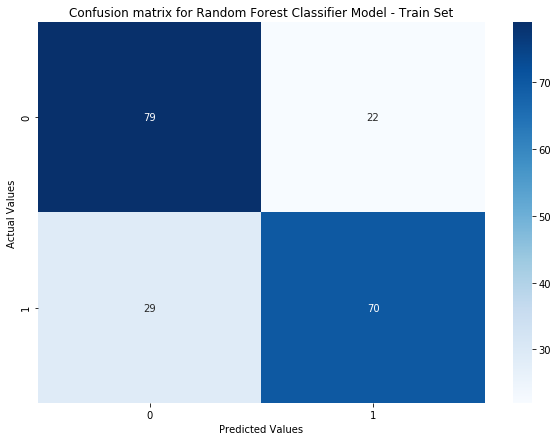



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       101
           1       0.76      0.71      0.73        99

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [43]:
plot_scores(log_reg_CV,X_test)

# DecisionTree Model Building

In [44]:
# Entering the parameters for hypertunning 
param_grid = {'min_samples_split': [2,5,10,15,20,40, 50, 60, 70], 
              'min_samples_leaf': [1,2,5,10,12, 13, 14, 15, 16, 17], 
              'max_features': ["auto","sqrt"],
              'max_depth': [int(x) for x in np.linspace(start=5,stop=30,num=3)], 
              'criterion': ['entropy','gini']}

In [45]:
# Training the DecisionTreeClassifier model with RandomizedSearchCV and ploting the confusion metrix

dc_tree=DecisionTreeClassifier()
dtree_CV = RandomizedSearchCV(estimator=dc_tree, param_distributions=param_grid, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)
dtree_CV.fit(X_train, y_train)

print(dtree_CV.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 17, 'criterion': 'gini'}


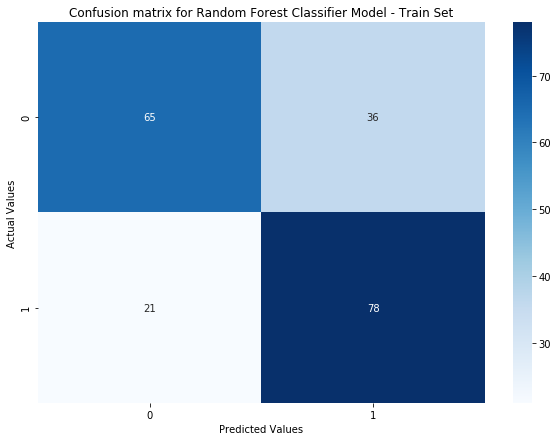



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.76      0.64      0.70       101
           1       0.68      0.79      0.73        99

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



In [46]:
plot_scores(dtree_CV,X_test)

# RandomForest Model Building

In [47]:
# Entering the parameters for hypertunning 
param_grid = {'n_estimators': [int(x) for x in np.linspace(start=100,stop=1200,num=12)], 
              'min_samples_split': [2,5,10,15,20], 
              'min_samples_leaf': [1,2,5,10,12], 
              'max_features': ["auto","sqrt"],
              'max_depth': [int(x) for x in np.linspace(start=5,stop=30,num=3)], 
              'criterion': ['entropy','gini']}

In [48]:
# Training the RandomForestClassifier model with RandomizedSearchCV 
random_forest = RandomForestClassifier()

random_forest_CV = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)

random_forest_CV.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [49]:
print(random_forest_CV.best_params_)

{'n_estimators': 1100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'gini'}


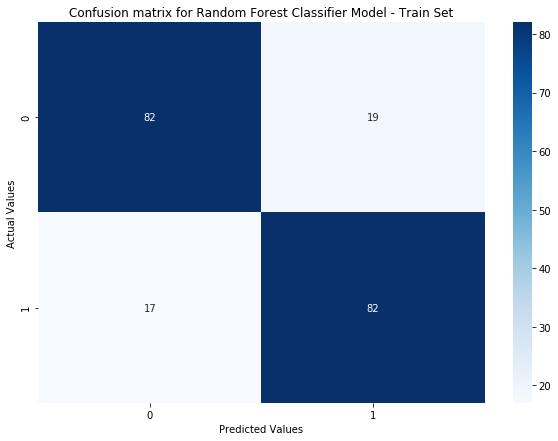



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       101
           1       0.81      0.83      0.82        99

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [50]:
plot_scores(random_forest_CV,X_test)

Note: Since the Random forest algorithm has the highest accuracy

In [51]:
# Creating Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= 'auto', max_depth= 17, criterion= 'entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Evaluation

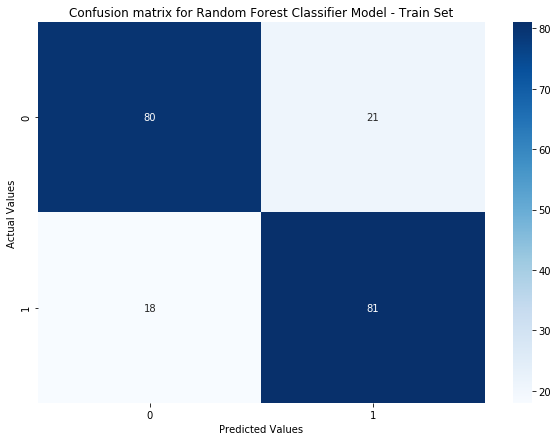



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       101
           1       0.79      0.82      0.81        99

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [52]:
plot_scores(rf_classifier,X_test)

# Predicting the model y using train values

In [55]:
# Creating a function for prediction
def diabetes_predict(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    value = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    value = sc.transform(value)

    return rf_classifier.predict(value)

In [56]:
# Example 2

prediction = diabetes_predict(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
      print('Oops! You Can Suffer by diabetes.')
else:
      print("Great! No need to worry, no symptoms of diabetes.")

Great! No need to worry, no symptoms of diabetes.


In [57]:
# Example 2

prediction = diabetes_predict(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
      print('Oops! You Can Suffer by diabetes.')
else:
      print("Great! No need to worry, no symptoms of diabetes.")

Great! No need to worry, no symptoms of diabetes.
